In [1]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from gradcam import VizGradCAM

2021-10-25 20:14:29.843961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-25 20:14:29.843999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# IMG_SIZE = (28, 28)
# IMG_SIZE = (56, 56)
IMG_SIZE = (224, 224)

In [3]:
# model = load_model('es_func_folder_x3.h5')
# model = load_model('es_func_exp.h5')
# model = load_model('es_func_folder_56x3.h5')
model = load_model('es_func_folder_224x3_c.h5')

2021-10-25 20:14:31.874034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-25 20:14:31.874077: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-25 20:14:31.874099: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a): /proc/driver/nvidia/version does not exist
2021-10-25 20:14:31.874307: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-25 20:14:31.916495: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 368181248 exceeds 10% of 

In [4]:
def prediction(img_path):
    img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)/255  # for regular
#     img = np.array(img)   # for es_func_exp.h5
    pred = model.predict(np.expand_dims(img, axis=0))
    return np.argmax(pred)

In [5]:
folder = '/home/a/datasets_all/mnist_png_224x3/testing/5/' # fol-98.3% exp-99.1% 56-99%
# folder = '/home/a/datasets/mnist_png/testing/9/' # fol-99.7%, exp-98.7%, 56-98%

files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

2021-10-25 20:14:39.175607: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3


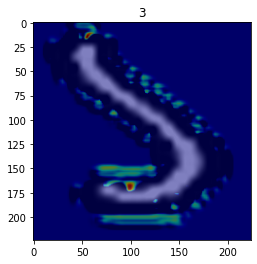

3


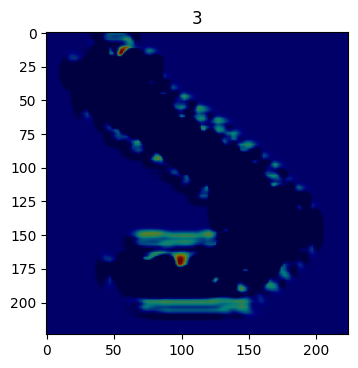

0


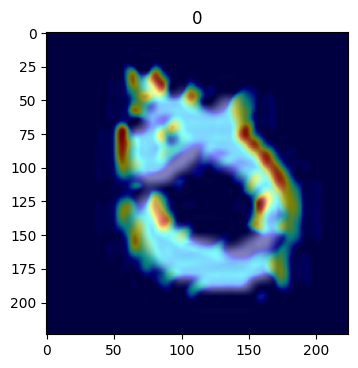

0


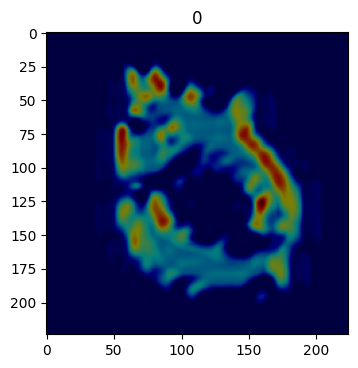

3


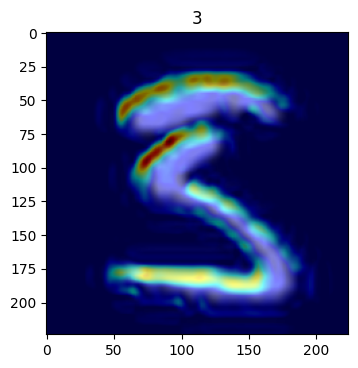

3


6


6


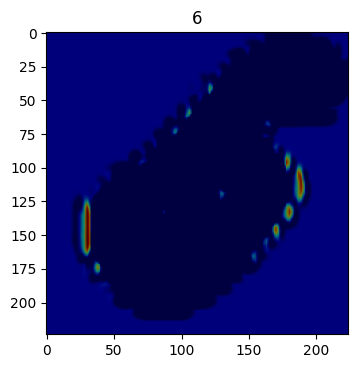

99.55156950672645 %
(array([0, 3, 5, 6]), array([  1,   2, 888,   1]))


In [6]:
preds = []
count = 0
lim = 4
for i in range(0, len(files)):
    res = prediction(os.path.join(folder,files[i]))
    preds.append(res)
    if pathlib.PurePath(folder).name  == str(res):
        count += 1
    else: 
        plt.title(res)
        img_path = os.path.join(folder, files[i])
        img = Image.open(img_path).resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
        img = np.array(img)/255  # for regular
#         img = np.array(img)  # for es_func_exp.h5
        VizGradCAM(
            model,
            img,
            plot_results=True
        )
        plt.title(res)
        plt.show()
        
        VizGradCAM(
            model,
            img,
            plot_results=False
        )
        plt.title(res)
        plt.show()
        
print (count / len(files) * 100, '%')   

results = np.array(preds)
print(np.unique(results, return_counts=True))